# Exploration as a time series

*Anders Poirel 28-02-2020*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
data = pd.read_csv('../data/Traffic_Collision_Data_from_2010_to_Present.csv')

In [4]:
data.shape

(519655, 18)

In [5]:
data.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description', 'Address',
       'Cross Street', 'Location'], dtype=object)

In [6]:
to_drop = ['DR Number', 'Date Reported', 'Reporting District', 'Crime Code',
           'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
           'Victim Descent', 'Premise Code']

In [7]:
data_t = data.drop(to_drop, axis = 1)

In [22]:
data_t.isna().any()

Date Occurred          False
Time Occurred          False
Area ID                False
Area Name              False
Premise Description     True
Address                False
Cross Street            True
Location               False
dtype: bool

### Overall trend

In [8]:
date_agg = data_t.groupby('Date Occurred').count()

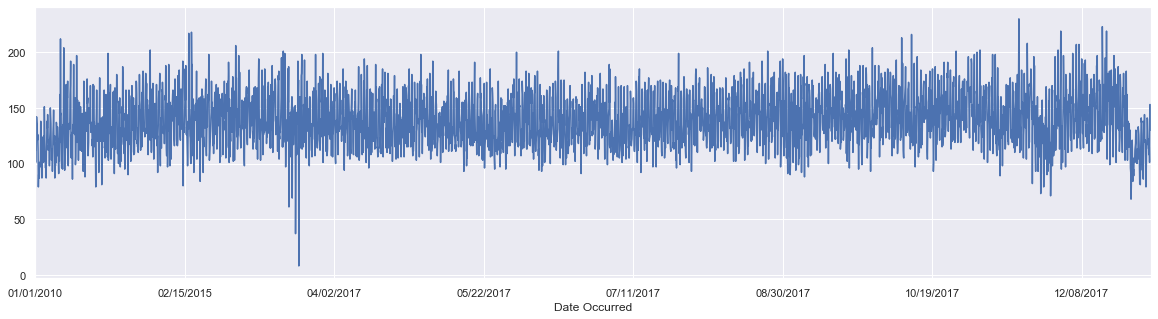

In [31]:
fig = plt.figure(figsize = (20, 5))
date_agg['Area ID'].plot()

### Yearly Pattern


In [101]:
data_t['Month'] = data_t['Date Occurred'].apply(lambda x: x.month)

In [102]:
year_agg = data_t.groupby('Month').count()

Text(0, 0.5, 'Number of Accidents')

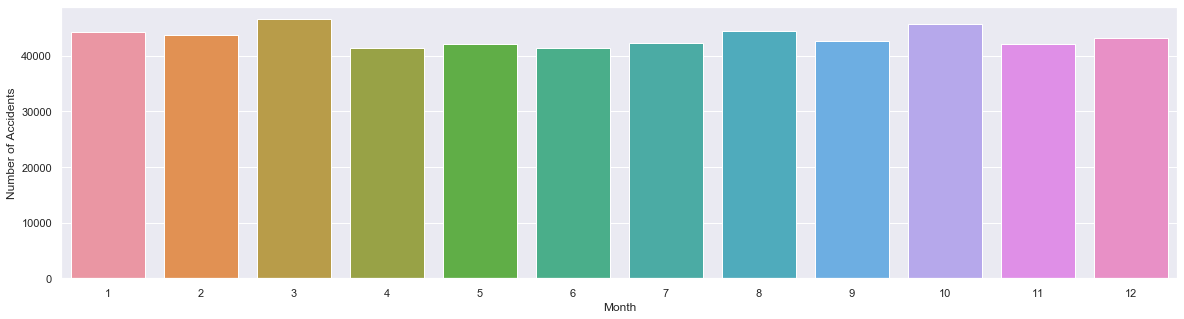

In [103]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x =  year_agg.index, y = year_agg['Area ID'])
plt.ylabel('Number of Accidents')

### Monthly Pattern

In [55]:
data_t['Day of Month'] = data_t['Date Occurred'].apply(lambda x: x.day)

In [64]:
month_agg = data_t.groupby('Day of Month').count()

Text(0, 0.5, 'Number of Accidents')

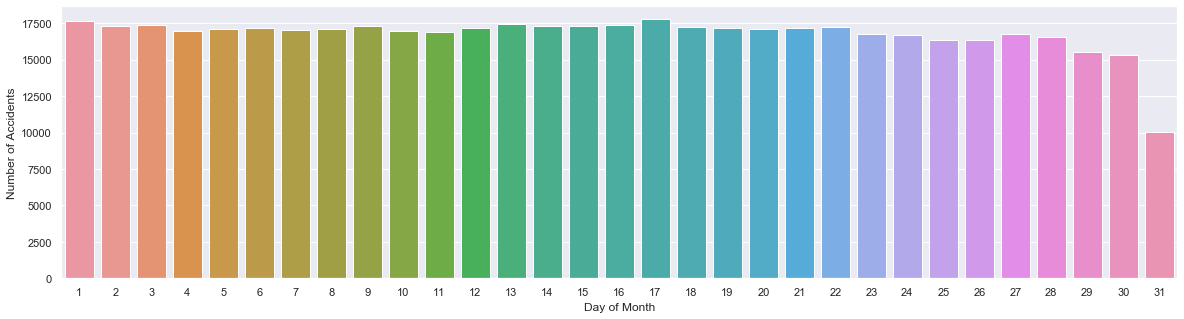

In [65]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x = month_agg.index, y = month_agg['Area ID'])
plt.ylabel('Number of Accidents')

The drop on the 29th likely only reflects the fact that the 29th only occurs one in 4 Februaries, and the 31 is only a day one month out of 2

### Weekly Pattern

In [68]:
data_t['Day of Week'] = data_t['Date Occurred'].apply(lambda x: x.day_name())

In [76]:
week_agg = data_t.groupby('Day of Week').count()

Text(0, 0.5, 'Number of Accidents')

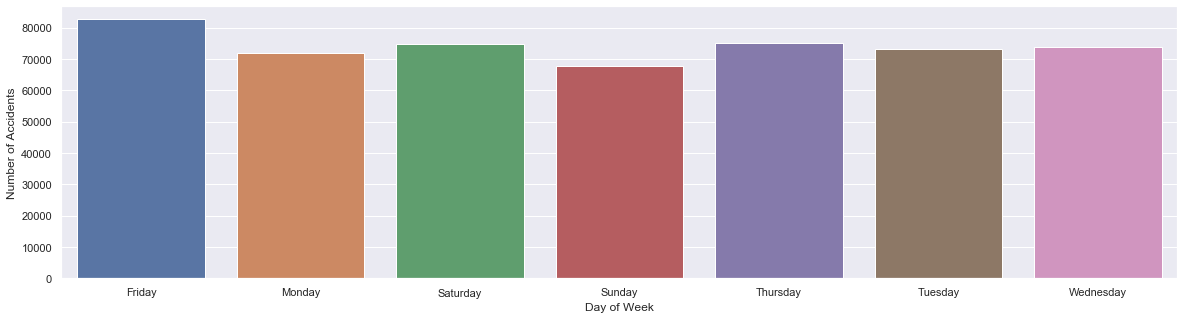

In [77]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x = week_agg.index, y = week_agg['Area ID'])
plt.ylabel('Number of Accidents')

### Daily Pattern

In [27]:
data_t['Hour'] = data_t['Time Occurred'].floordiv(100)

In [70]:
day_agg = data_t.groupby('Hour').count()

Text(0, 0.5, 'Number of Accidents')

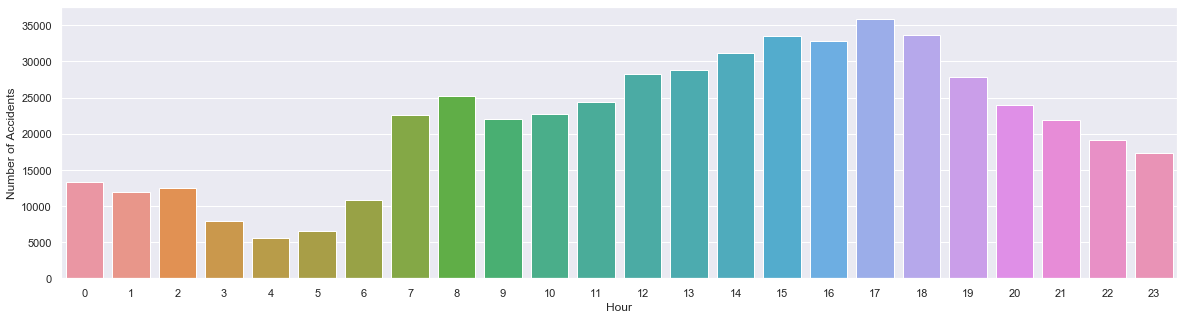

In [79]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(x = day_agg.index, y = day_agg['Area ID'])
plt.ylabel('Number of Accidents')

### Unique locations

In [88]:
len(data_t['Address'].unique())

26652

In [90]:
520000 / 26652

19.510730901996098

We have on average ~ 20 datapoints per address, though many only have one 